## Classification Assignment - 3 , 2019AIML622

#### 1. Loading the data

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [74]:
loans = pd.read_csv('loan_data.csv')

In [75]:
## Get some peek in the data
loans.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [76]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [77]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### 2. countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid.

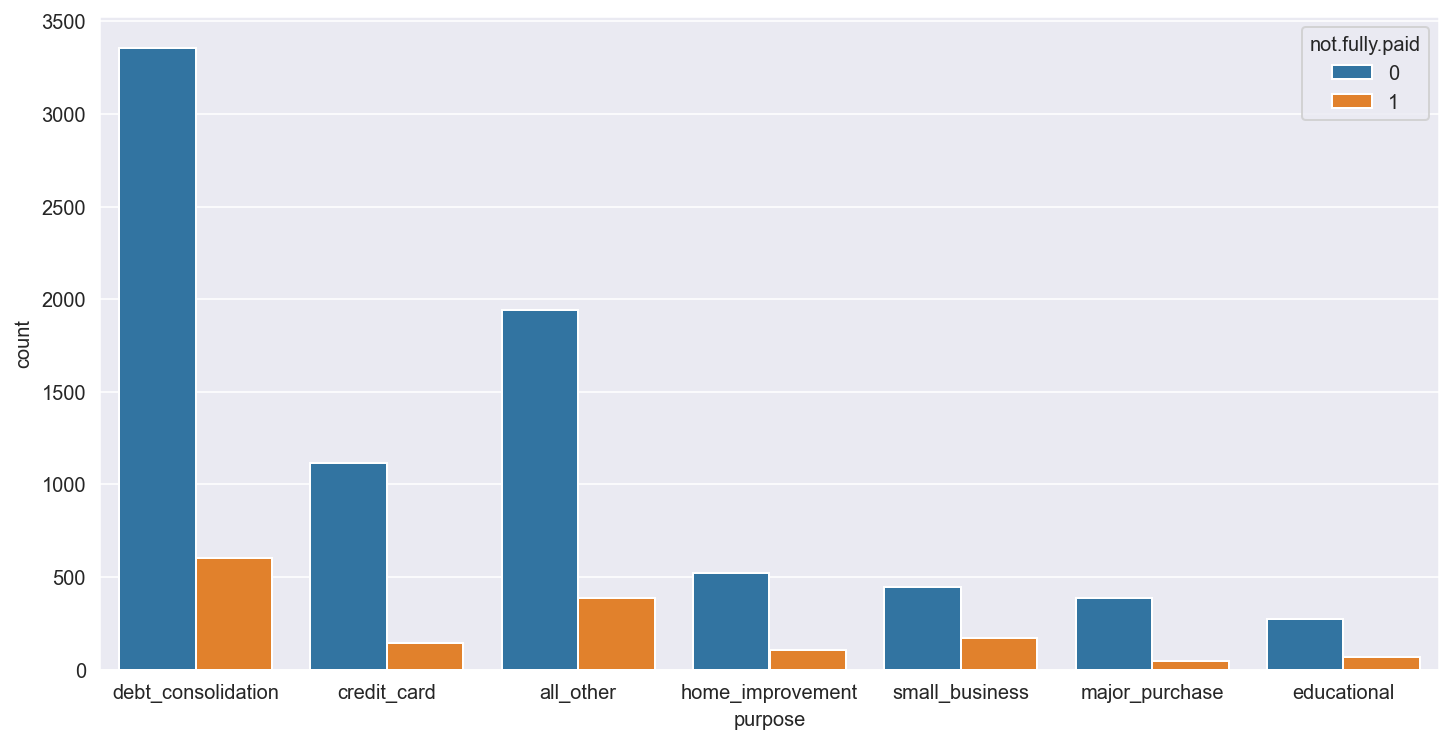

In [78]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loans)

#### 3. Print a heatmap to check NULL values

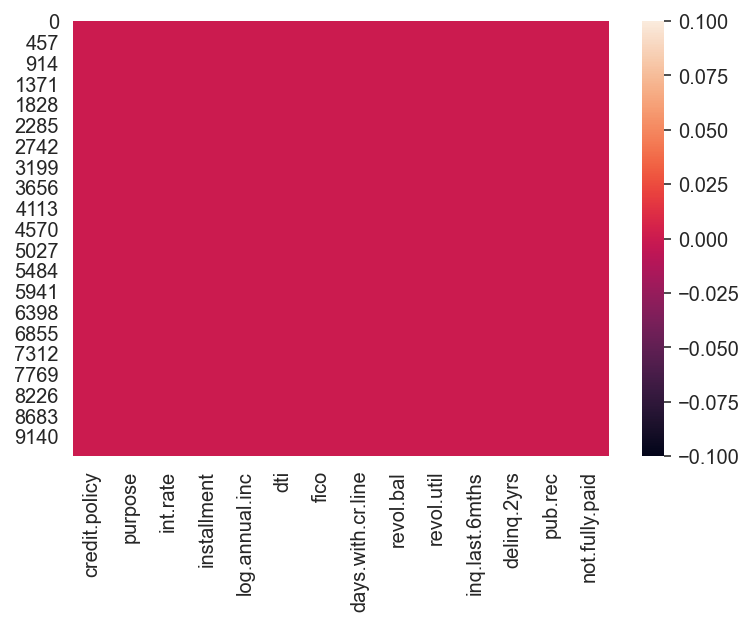

In [79]:
#checking for null values
sns.heatmap(loans.isnull())

#### 4. Perform startified splitting of train and test data

In [80]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [81]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
## Normal Train/Test split

#X = final_data.drop('not.fully.paid', axis = 1)
#y = final_data['not.fully.paid']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state= 101)

#print(type(X_train), type(X_test), type(y_train), type(y_test))

In [84]:
## implementing custom startified splitting of train and test data

import numpy as np
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):  
    for i in train_index:
        X_train2 = pd.DataFrame(X.iloc[:i])
        y_train2 = pd.DataFrame(y.iloc[:i])
        
for train_index, test_index in skf.split(X, y):        
    for i in test_index:
        X_test2 = pd.DataFrame(X.iloc[:i])
        y_test2 = pd.DataFrame(y.iloc[:i])

# print(type(X_train2))
# print(X_test2)
# print(type(y_train2))
# print(y_test2)  

In [85]:
print(type(X_train2), type(X_test2), type(y_train2), type(y_test2))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


#### 5. Build a classifier model using Decision Tree algorithm and plot the  same

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
## Using Decision Tree Classifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train2, y_train2)
y_predict = dtree.predict(X_test2)

##### plotting decision tree

In [88]:
from sklearn import tree
from sklearn.tree import plot_tree

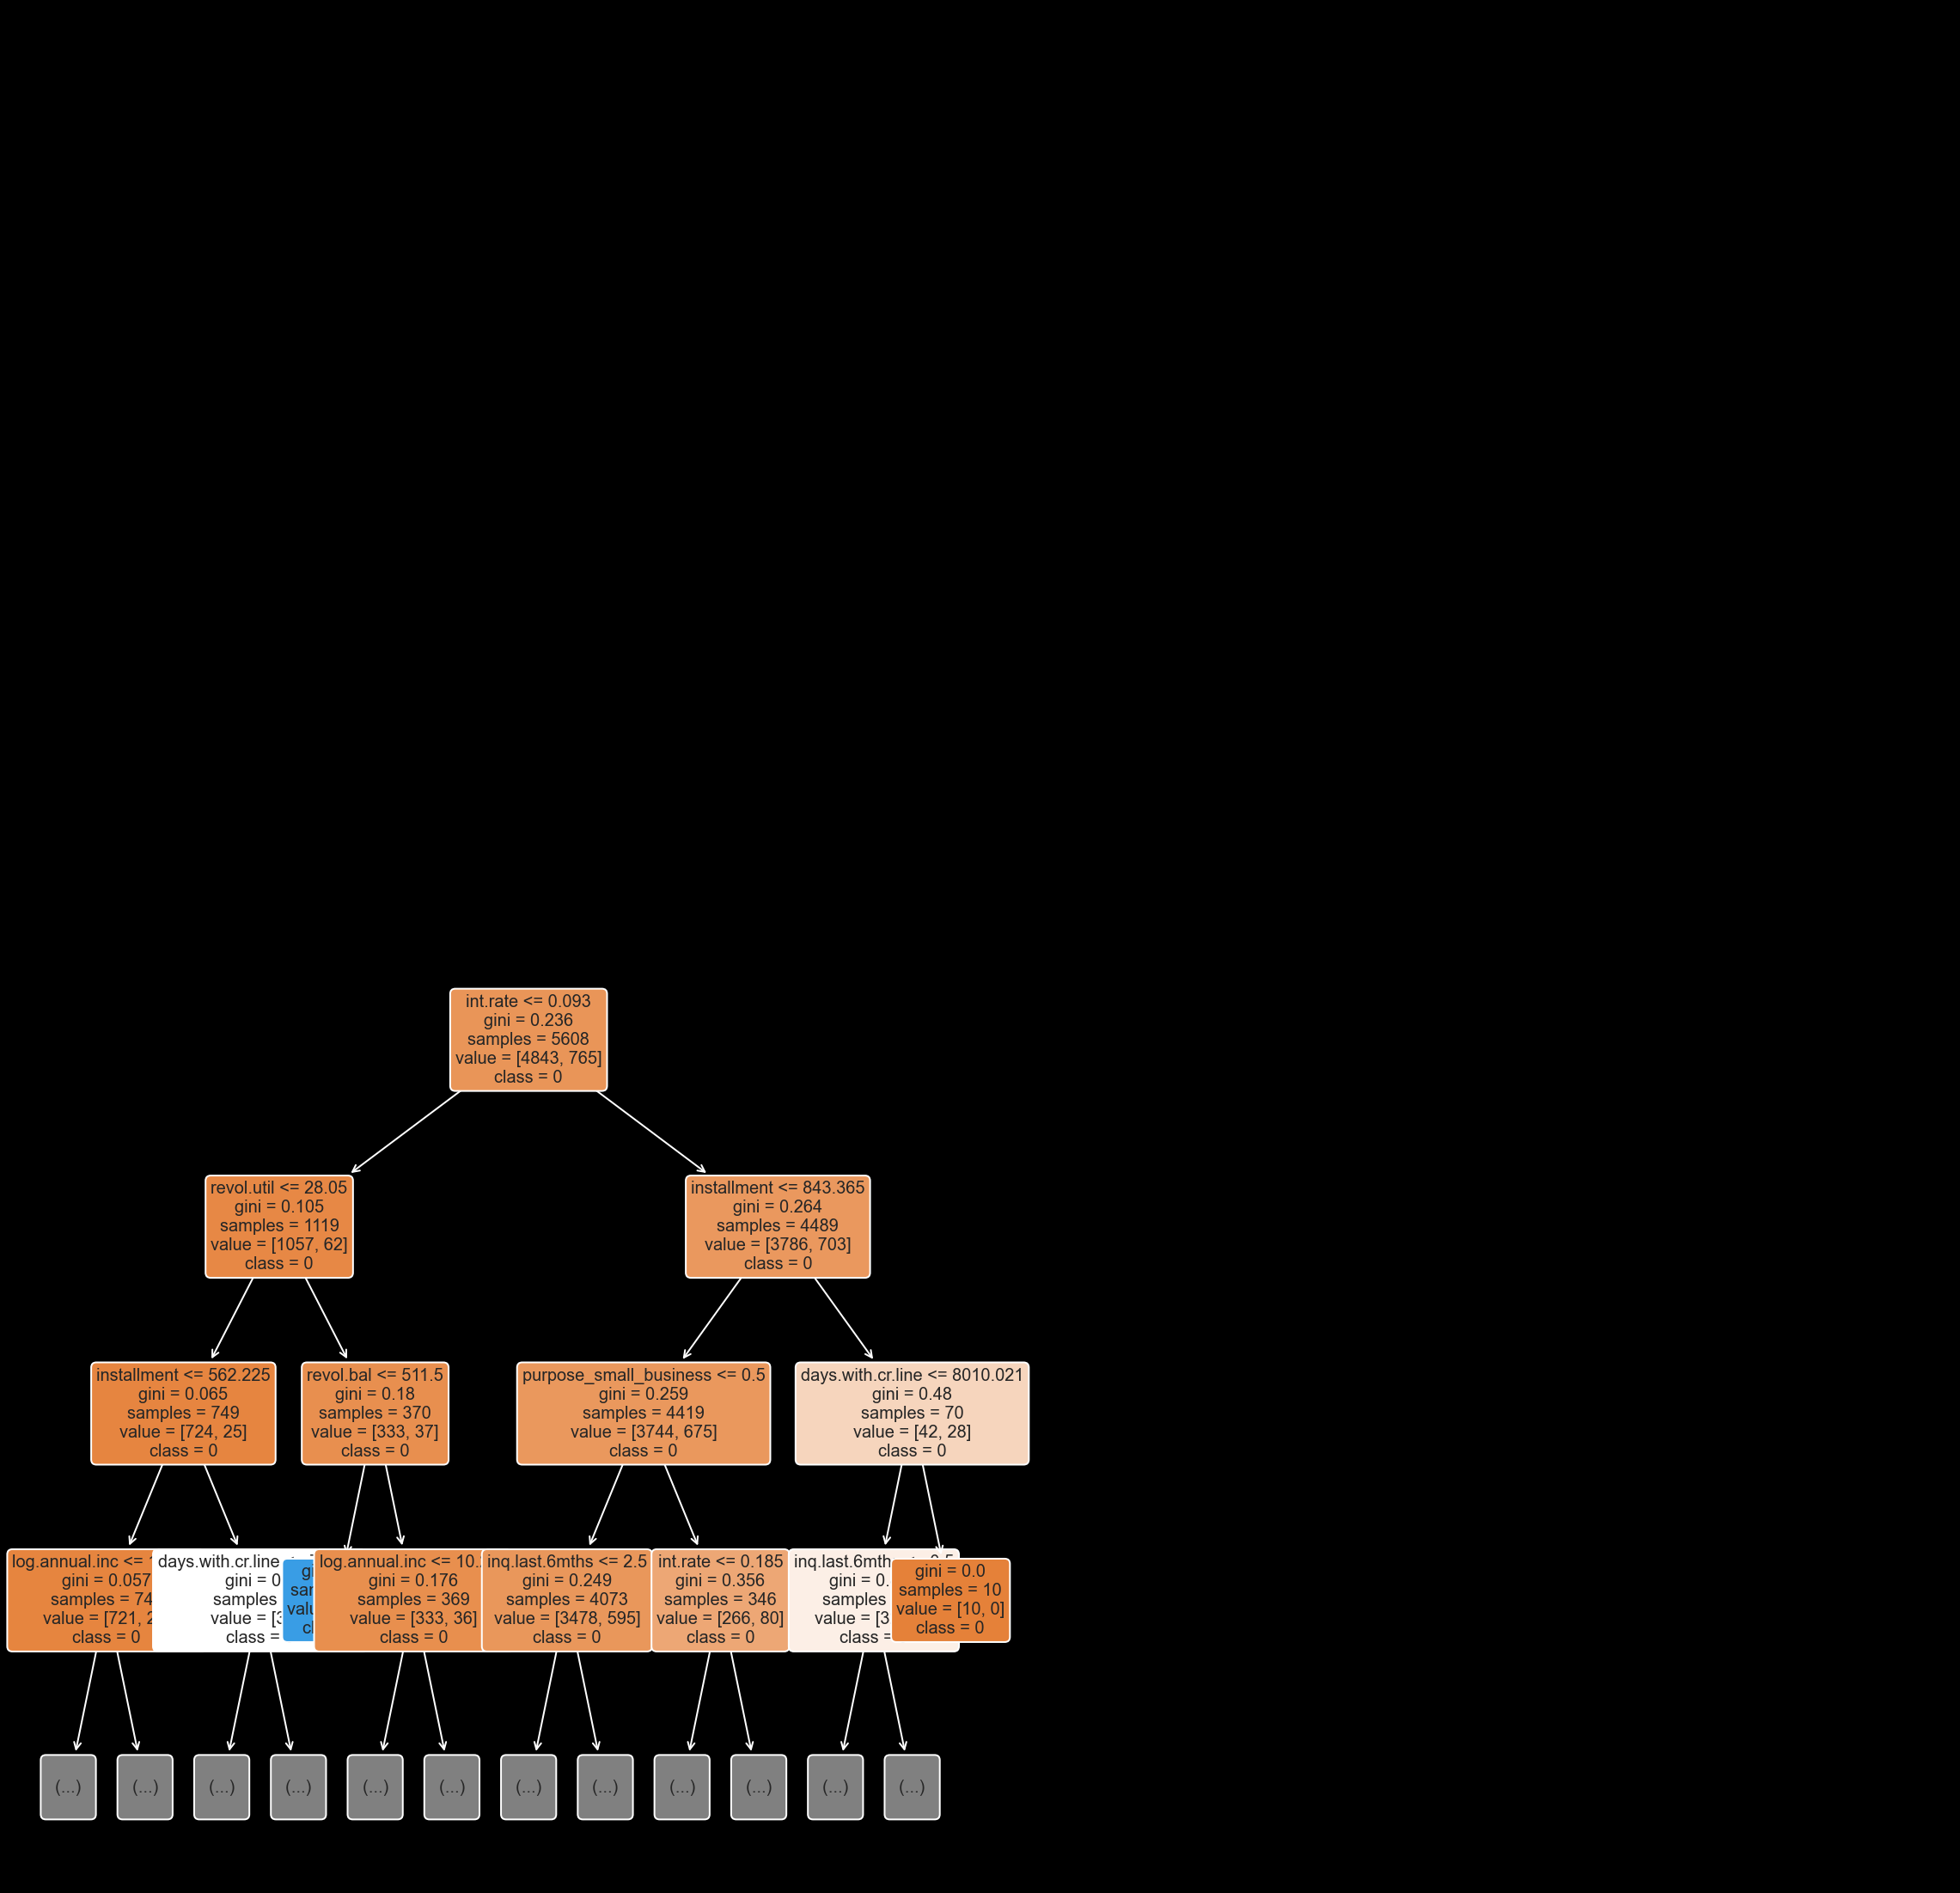

In [89]:
plt.figure(figsize=(20,20), facecolor='k')
a=plot_tree(dtree, max_depth=3, feature_names=list(X.columns), class_names=['0','1'], filled=True, rounded=True, fontsize=10)

#### 6. Print classification report

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

In [91]:
print("Classification Report\n")

print(classification_report(y_test2, y_predict))

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8045
           1       0.62      0.62      0.62      1532

    accuracy                           0.88      9577
   macro avg       0.77      0.77      0.77      9577
weighted avg       0.88      0.88      0.88      9577



In [92]:
print("Confustion Matrix \n")

print(confusion_matrix(y_test2, y_predict))

Confustion Matrix 

[[7458  587]
 [ 588  944]]


#### 7. Find out the stratified cross validation accuracy 

In [93]:
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = DecisionTreeClassifier()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)

print("Cross Validation Accuracy \n")
print(results_skfold)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross Validation Accuracy 

[0.76072659 0.76949577 0.52443609]
